In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("winequality-red.csv")

In [12]:
cutoff = 7
data['quality'] = data['quality'] >= cutoff

In [13]:
X = data.drop(columns=['quality'])
y = data['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [31]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]}

In [32]:
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [34]:
best_params = grid_search.best_params_
dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [35]:
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

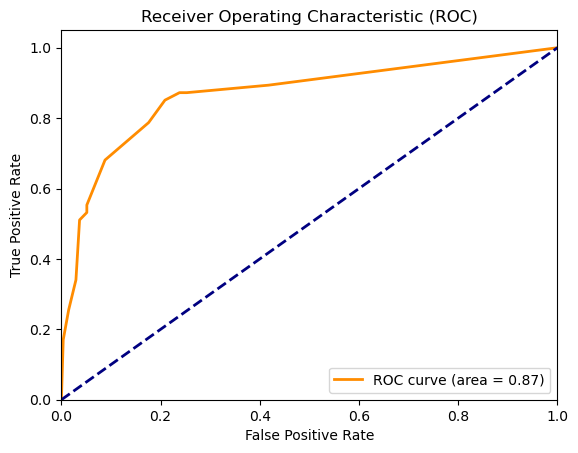

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
AUC Score: 0.87


In [37]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"Best Hyperparameters: {best_params}")
print(f"AUC Score: {roc_auc:.2f}")

In [38]:
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.87
ROC AUC: 0.72


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.92      0.93      0.93       273
        True       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320

